In [1]:
import sys
import os

# hacky way to import modules from ../src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")
    
from shapes import *

### First 8 pictures from train dataset, no augmentations:

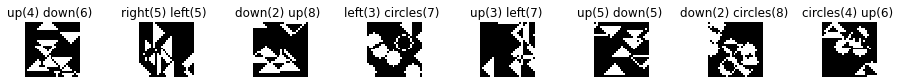

In [5]:
dataset = ShapesDataset("../data/extracted")

columns = 8
fig, axs = plt.subplots(1, columns, figsize=(2 * columns, 1))
for column in range(columns):
    img, labels = dataset[column]
    ax = axs[column]
    ax.imshow(np.asarray(img), interpolation='none')
    ax.set_title(describe_labels(labels))
    ax.axis('off')

### First 8 pictures from train dataset, with augmentations:

<Figure size 576x576 with 0 Axes>

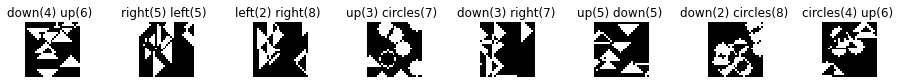

In [6]:
t = transforms.Compose([
    ImageTransform(transforms.ToTensor()), # convert image to torch representation
    random_rotate,
    random_flip,
    ImageTransform(lambda img: img.permute(1, 2, 0)) # swap dimensions to plot image
])

dataset = ShapesDataset("../data/extracted", transform=t)

fig, axs = plt.subplots(1, columns, figsize=(2 * columns, 1))
for column in range(columns):
    img, labels = dataset[column]
    ax = axs[column]
    ax.imshow(np.asarray(img), interpolation='none')
    ax.set_title(describe_labels(labels))
    ax.axis('off')